In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path  


In [2]:
#df = pd.read_csv("Heapsort-k64-n4096-low1800-high360-frekv125.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])
name_ = []
loopTime_ = []
iterTime_ = []
avgCurrent_ = []
avgWatt_ = []
avgJoule_ = []

df4k = pd.read_csv("heapsort-k16-n4096.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df6k = pd.read_csv("heapsort-k16-n6144.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df8k = pd.read_csv("heapsort-k16-n8192.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df10k = pd.read_csv("heapsort-k16-n10240.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df12k = pd.read_csv("heapsort-k16-n12288.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df14k = pd.read_csv("heapsort-k16-n14336.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df16k = pd.read_csv("heapsort-k16-n16384.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

dfdd = pd.read_csv("dijkstra_k16_d_d.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

dfdud = pd.read_csv("dijkstra_k16_d_ud.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

dfsd = pd.read_csv("dijkstra_k16_s_d.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

dfsud = pd.read_csv("dijkstra_k16_s_ud.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])


In [3]:
# Gets the index of all measurements considered a spike
def getSpikeList(df, limit):
    spikeindexlist = []
    for i in range(0, df['nb'].max()+1):
        if df['Current'][i] > limit:
            spikeindexlist.append(i)
    return spikeindexlist

In [4]:
# Gets the times of each loop and how many loops there are
def findTimes(spikes, df, dataRange):
    loopTimeList = []
    i = 0
    while i <= dataRange: 
        if i not in spikes:
            loopStart = df['time'][i]
            while i not in spikes and i <= dataRange:
                loopStop = df['time'][i]
                i +=1
            loopTimeList.append(loopStop - loopStart)
        i +=1
    print("Number of loops: ")
    print(len(loopTimeList))
    return loopTimeList

In [5]:
# Calculates the avarage time of the loops
def avgTimeLoop(loopTimeList):
    time = sum(loopTimeList)/len(loopTimeList)
    print("Avarage time of loop: ")
    print(time)
    print("[s]")
    return time

In [6]:
# Calculates the avarage time of one iteration 
def avgTimeIteration(looptime, repetitions):
    time = looptime / repetitions
    print("\nAvarage time of one Iteration: ")
    print(time)
    print("[s]")
    return time

In [7]:
# Calculates the avarage current during one iteration
def avgCurrent(df, spikeList):
    sumCurrent = 0;
    dataPoints = 0;
    for i in range(df['nb'].iloc[-1]):
        if i not in spikeList:
            sumCurrent += df['Current'][i]
            dataPoints += 1
    current = sumCurrent / dataPoints
    print("\nAvarage Current in one iteration: ")
    print(current)
    print("[mA]")
    return current

In [8]:
def avgWatt(current):
    watt = current * 5
    print("\nAvarage Watt for one iteration: ")
    print(watt)
    print("[W]")
    return watt

In [9]:
def avgJoule(watt, time):
    joule = watt * time
    print("\nAvarage Joule in one iteration: ")
    print(joule)
    print("[J]")
    return joule

In [10]:
def resetLists():
    del name_[:]
    del loopTime_[:]
    del iterTime_[:]
    del avgCurrent_[:]
    del avgWatt_[:]
    del avgJoule_[:] 

In [11]:
# Full data processing
def runData(df, energyLimit, timeRepetion, loopRepititions, name):
    print(name)
    
    # Read for energyLimit
    plot = sns.scatterplot(data=df, x = 'time', y = 'Current')
    plot.set(xlim =(0, df['time'].iloc[-1]), ylim = (0, 0.2), title="Energy")
    plt.show()
    
    # Get a sense of runtime distribution
    spikes = getSpikeList(df, energyLimit)
    timelist = findTimes(spikes,df, df['nb'].iloc[-1]-1)
    hist = sns.histplot(data=timelist, kde=True)
    hist.set(ylim = (0,timeRepetion), title="Times")
    plt.show()
    
    # Calculate
    looptime = avgTimeLoop(timelist)
    time = avgTimeIteration(looptime, loopRepititions)
    current = avgCurrent(df, spikes)
    watt = avgWatt(current)
    joule = avgJoule(watt, time)
    
    # Save data
    name_.append(name)
    loopTime_.append(looptime)
    iterTime_.append(time)
    avgCurrent_.append(current)
    avgWatt_.append(watt)
    avgJoule_.append(joule)

In [12]:
def writeCSV(title):
    result = {'name':name_, 'loopTime':loopTime_, 'iterTime':iterTime_, 'avgCurrent':avgCurrent_, 'avgWatt':avgWatt_, 'avgJoule':avgJoule_}
    rf = pd.DataFrame(data=result)
    filepath = Path(title)  
    rf.to_csv(filepath,index=False)
    return rf

# Heapsort

In [13]:
resetLists()

In [14]:
#      (Data, Greater than means spike, hist ylim, Repetions in loop, Name)
#runData(df4k, 0.09,                     3,         1550,              "Heapsort FPGA k: 16 n: 4K")

Heapsort FPGA k: 16 n: 6K


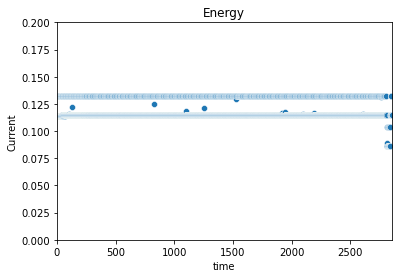

Number of loops: 
541


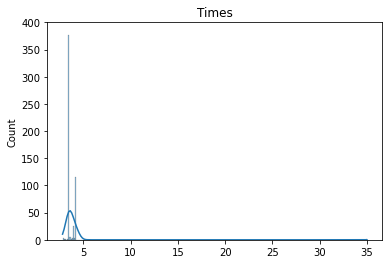

Avarage time of loop: 
3.7331109057301277
[s]

Avarage time of one Iteration: 
0.0036138537325557866
[s]

Avarage Current in one iteration: 
0.11414196784397343
[mA]

Avarage Watt for one iteration: 
0.5707098392198672
[W]

Avarage Joule in one iteration: 
0.00206246188267103
[J]


In [15]:
#      (Data, Greater than means spike, hist ylim, Repetions in loop, Name)
runData(df6k, 0.125,                    400,       1033,              "Heapsort FPGA k: 16 n: 6K")

Heapsort FPGA k: 16 n: 8K


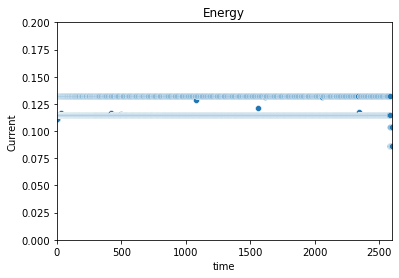

Number of loops: 
468


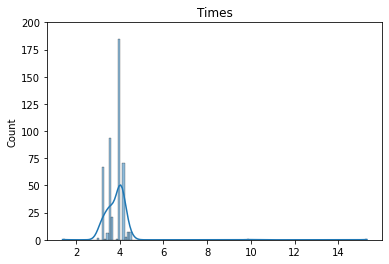

Avarage time of loop: 
3.843196581196583
[s]

Avarage time of one Iteration: 
0.004958963330576236
[s]

Avarage Current in one iteration: 
0.1144229660504848
[mA]

Avarage Watt for one iteration: 
0.5721148302524239
[W]

Avarage Joule in one iteration: 
0.002837096464100618
[J]


In [16]:
#      (Data, Greater than means spike, hist ylim, Repetions in loop, Name)
runData(df8k, 0.125,                    200,       775,               "Heapsort FPGA k: 16 n: 8K")

Heapsort FPGA k: 16 n: 10K


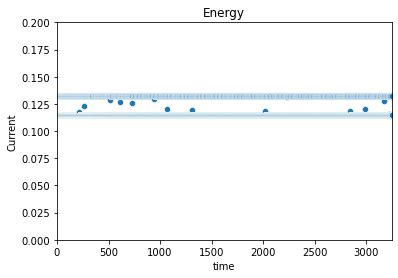

Number of loops: 
571


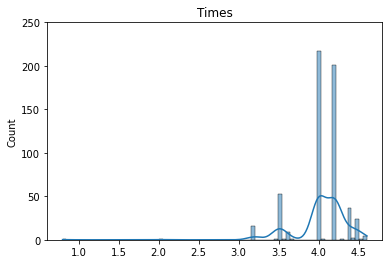

Avarage time of loop: 
4.037879159369531
[s]

Avarage time of one Iteration: 
0.00651270832156376
[s]

Avarage Current in one iteration: 
0.11458742980997376
[mA]

Avarage Watt for one iteration: 
0.5729371490498688
[W]

Avarage Joule in one iteration: 
0.003731372538350097
[J]


In [17]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
runData(df10k, 0.125,                    250,       620,               "Heapsort FPGA k: 16 n: 10K")

Heapsort FPGA k: 16 n: 12K


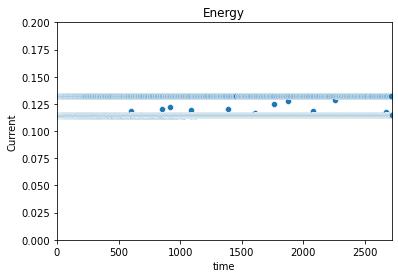

Number of loops: 
468


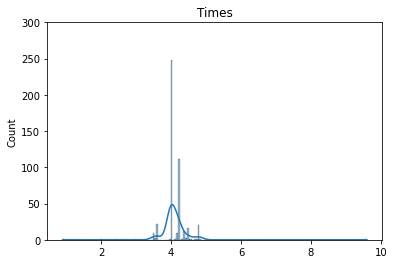

Avarage time of loop: 
4.087816239316238
[s]

Avarage time of one Iteration: 
0.007922124494798911
[s]

Avarage Current in one iteration: 
0.11444156148610671
[mA]

Avarage Watt for one iteration: 
0.5722078074305336
[W]

Avarage Joule in one iteration: 
0.004533101487360608
[J]


In [18]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
runData(df12k, 0.125,                    300,       516,               "Heapsort FPGA k: 16 n: 12K")

In [19]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
#runData(df14k, 0.125,                    300,       442,               "Heapsort FPGA k: 16 n: 14K")

Heapsort FPGA k: 16 n: 16K


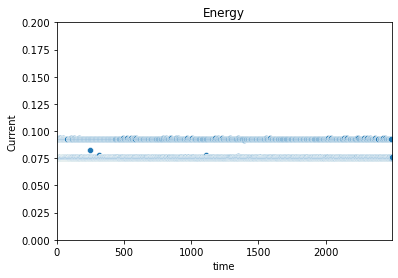

Number of loops: 
416


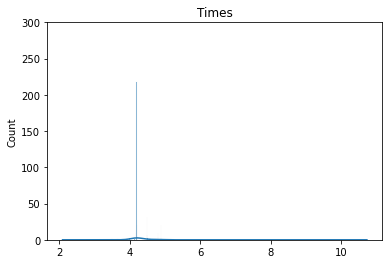

Avarage time of loop: 
4.3393918269230785
[s]

Avarage time of one Iteration: 
0.011212898777579014
[s]

Avarage Current in one iteration: 
0.07564102142420874
[mA]

Avarage Watt for one iteration: 
0.3782051071210437
[W]

Avarage Joule in one iteration: 
0.004240775583311691
[J]


In [20]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
runData(df16k, 0.09,                    300,       387,               "Heapsort FPGA k: 16 n: 16K")

In [21]:
rf = writeCSV("heapsort-k16-data.csv")
rf

,name,loopTime,iterTime,avgCurrent,avgWatt,avgJoule
0,Heapsort FPGA k: 16 n: 6K,3.733111,0.003614,0.114142,0.570710,0.002062
1,Heapsort FPGA k: 16 n: 8K,3.843197,0.004959,0.114423,0.572115,0.002837
2,Heapsort FPGA k: 16 n: 10K,4.037879,0.006513,0.114587,0.572937,0.003731
3,Heapsort FPGA k: 16 n: 12K,4.087816,0.007922,0.114442,0.572208,0.004533
4,Heapsort FPGA k: 16 n: 16K,4.339392,0.011213,0.075641,0.378205,0.004241


# Djikstra

In [22]:
resetLists()

Djikstra FPGA k: 16, Dense Directed


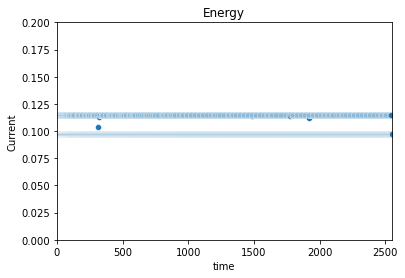

Number of loops: 
415


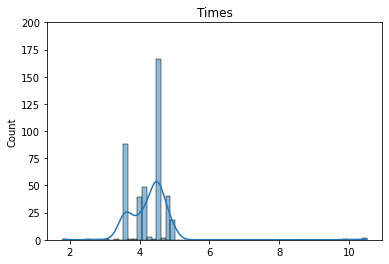

Avarage time of loop: 
4.293272289156616
[s]

Avarage time of one Iteration: 
0.0004770302543507351
[s]

Avarage Current in one iteration: 
0.09734795363122237
[mA]

Avarage Watt for one iteration: 
0.48673976815611186
[W]

Avarage Joule in one iteration: 
0.00023218959540612788
[J]


In [23]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
runData(dfdd,  0.11,                     200,  9000,             "Djikstra FPGA k: 16, Dense Directed")

Djikstra FPGA k: 16, Dense Undirected


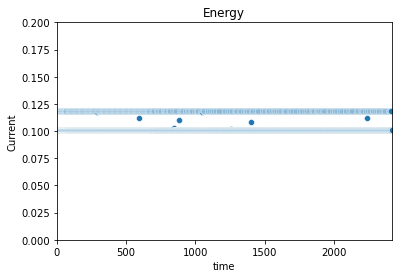

Number of loops: 
396


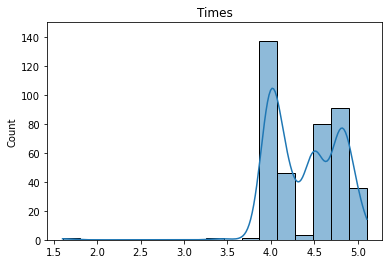

Avarage time of loop: 
4.391040404040402
[s]

Avarage time of one Iteration: 
0.0004878933782267114
[s]

Avarage Current in one iteration: 
0.10103191309923672
[mA]

Avarage Watt for one iteration: 
0.5051595654961836
[W]

Avarage Joule in one iteration: 
0.0002464640069534707
[J]


In [24]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
runData(dfdud,  0.11,                    150,  9000,             "Djikstra FPGA k: 16, Dense Undirected")

Djikstra FPGA k: 16, Sparse Directed


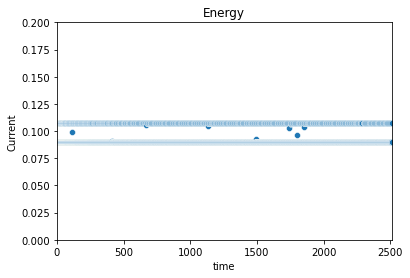

Number of loops: 
411


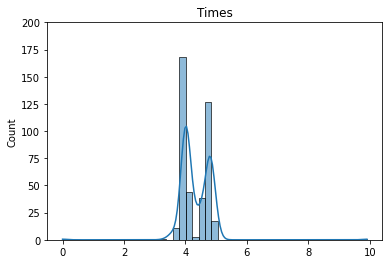

Avarage time of loop: 
4.343725060827245
[s]

Avarage time of one Iteration: 
0.00048263611786969387
[s]

Avarage Current in one iteration: 
0.08965908808597035
[mA]

Avarage Watt for one iteration: 
0.44829544042985175
[W]

Avarage Joule in one iteration: 
0.00021636357102774827
[J]


In [25]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
runData(dfsd,  0.1,                      200,  9000,             "Djikstra FPGA k: 16, Sparse Directed")

Djikstra FPGA k: 16, Sparce Undirected


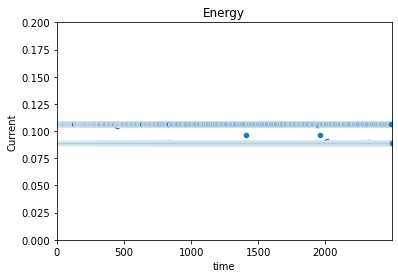

Number of loops: 
406


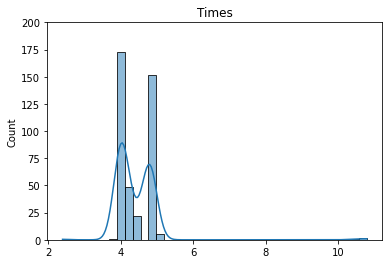

Avarage time of loop: 
4.408546798029556
[s]

Avarage time of one Iteration: 
0.0004898385331143951
[s]

Avarage Current in one iteration: 
0.089169102526319
[mA]

Avarage Watt for one iteration: 
0.445845512631595
[W]

Avarage Joule in one iteration: 
0.00021839231190309602
[J]


In [26]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
runData(dfsud,  0.1,                     200, 9000,             "Djikstra FPGA k: 16, Sparce Undirected")

In [27]:
rf = writeCSV("Djikstra-k16-data.csv")
rf

,name,loopTime,iterTime,avgCurrent,avgWatt,avgJoule
0,"Djikstra FPGA k: 16, Dense Directed",4.293272,0.000477,0.097348,0.486740,0.000232
1,"Djikstra FPGA k: 16, Dense Undirected",4.391040,0.000488,0.101032,0.505160,0.000246
2,"Djikstra FPGA k: 16, Sparse Directed",4.343725,0.000483,0.089659,0.448295,0.000216
3,"Djikstra FPGA k: 16, Sparce Undirected",4.408547,0.000490,0.089169,0.445846,0.000218
